# Exercise 4: Learning with a Multilayer Perceptron (MLP)
In this exercise, we will study a multilayer perceptron (MLP) with one hidden layer (comprising $M$ hidden neurons) and a single output neuron.

We obtain the output of the MLP through *forward propagation* as follows:

$$
\begin{align}
    \boldsymbol{v}_{i} &= \sigma_{\beta} \left( \boldsymbol{\hat{x}}_{i} \boldsymbol{\hat{W}}_{h}^{T}  \right) \\
    y_{i} &= \sigma_{\beta} \left( \boldsymbol{\hat{v}}_{i} \boldsymbol{\hat{w}}_{o}^{T} \right)
\end{align}
$$

where 
- $\boldsymbol{\hat{x}}_{i} \in \mathbb{R}^{1 \times (N + 1)}$ is the extended `sample` $\boldsymbol{x}_{i} \in \mathbb{R}^{1 \times N}$,
- $\boldsymbol{\hat{W}}_{h} \in \mathbb{R}^{M \times (N + 1)}$ are the threshold extended `hidden_weights` of the hidden neurons,
- $\boldsymbol{v}_{i} \in \mathbb{R}^{1 \times M}$ are the $M$ `hidden_outputs` of the hidden neurons, 
- $\boldsymbol{\hat{v}}_{i} \in \mathbb{R}^{1 \times (M + 1)}$ is the extended hidden layer output vector,
- $\boldsymbol{\hat{w}}_{o} \in \mathbb{R}^{1 \times (M + 1)}$ are the threshold extended `output_weights` of the output neuron,
- $y_{i} \in \mathbb{R}$ is the scalar `output` of the output neuron,
- $\sigma_{\beta} \left(\cdot\right) = \text{tanh}\left(\frac{\beta}{2}\cdot\right)$ is the perceptron `activation_function`.

**Note**: The _threshold trick_ is applied, i.e. the threshold of each neuron is included as an additional _first_ component for each extended weight vector.

## Preamble
The following code downloads and imports all necessary files and modules into the virtual machine of Colab. Please make sure to execute it before solving this exercise. This mandatory preamble will be found on all exercise sheets.

In [1]:
import sys, os
if 'google.colab' in sys.modules:
  if os.getcwd() == '/content':
    !git clone 'https://github.com/inb-uni-luebeck/cs4405.git'
    os.chdir('cs4405')

import numpy as np
from matplotlib import pyplot as plt
from utils import utils_4 as utils

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Exercise 4.1: Implementation of the Backpropagation Algorithm
Now we want to learn the `hidden_weights` $\boldsymbol{\hat{W}}_h$ and the `output_weights` $\boldsymbol{\hat{w}}_o$ from training data. Assuming that $\beta=2$, i.e. $\sigma_2\left(\cdot\right)=\text{tanh}\left(\cdot \right)$, the backpropagation rule defined as follows:

$$
\begin{align}
    \delta_o &= \left( s_i - y_i \right) \cdot \left( 1 - y_i^{2} \right) \\
    \boldsymbol{\delta}_{h} &= \delta_o \cdot \boldsymbol{w}_{o} \odot \left( 1 - \boldsymbol{v}_i \odot \boldsymbol{v}_i \right)
\end{align}
$$

where $s$ is the `label` of an input $\boldsymbol{x}$ and $\odot$ is the element-wise Hadamard product. Finally, the learning rule including the `learning_rate` $\varepsilon$ for the weight update is:

$$
\begin{align}
    \Delta \boldsymbol{\hat{w}}_{o} &= \varepsilon \cdot \delta_o \cdot \boldsymbol{\hat{v}}_i \\
    \Delta \boldsymbol{\hat{w}}_{h} &= \varepsilon \cdot \boldsymbol{\delta}^{T}_{h} \cdot \boldsymbol{\hat{x}}_i.
\end{align}
$$

**Tasks**:
- Implement the backpropagation algorithm of the MLP.

**Preparation**:
- Formulate the backpropagation algorithm in pseudocode. You should particularly pay attention to the order in which computations are performed. For every variable, specify its dimension (see also the programming hints below).

**Programming Hints**:
- Note: The source code template expects the thresholds of the hidden layer neurons and the output neuron to be in the _first_ component.
- In each adaptation of the weight vectors a fix `learning_rate` $\varepsilon \in \mathbb{R}^{+}$ has to be employed.
- As noted above, we need to use $\beta=2$. This means that the MLP does not output a discrete classification ($-1$ or $1$) but a real value $y_i \in \left[ -1;1 \right]$.
- You should care about the treatment of the threshold $\theta$ in particular. Note that $\theta$ is necessary for forward propagation but not for backpropagation, i.e., for computing the $\delta$ values.
- You can implement both the backpropagation rule and the learning rule without any for-loops (`help(np.outer)`).

In [0]:
def learn_mlp(samples, labels, hidden_neurons, learning_rate, epochs):
  
  # n_samples: number of training samples / n_features: number of features
  n_samples, n_features = samples.shape

  # initialize the weights for the hidden layer (threshold trick included)
  hidden_weights = np.random.uniform(low=-1,
                                     high=1,
                                     size=(hidden_neurons, n_features + 1))
  
  # initialize the weights for the output layer (threshold trick included)
  output_weights = np.random.uniform(low=-1,
                                     high=1,
                                     size=(hidden_neurons + 1,))
  
  for epoch in range(epochs):
    
    # generate randomly permuted index array
    indexes = np.random.permutation(n_samples)
    
    # iterate through all indexes in the index array
    for index in indexes:
      
      # select training sample and corresponding class label according to generated random permutation
      sample = samples[index]
      label = labels[index]

      # forward propagation
      output, hidden_outputs = utils.classify_mlp(sample, hidden_weights, output_weights, beta=2)

      # was the data point classified incorrectly?
      if (label * output) < 0:
        
        # TODO: implement the backpropagation rule
        delta_output = 
        delta_hidden = 

        # extend tensors with '-1' dimension as first component (threshold trick)
        sample = utils.extend(sample)
        hidden_outputs = utils.extend(hidden_outputs)

        # TODO: implement the learning rule for the weight updates
        output_weights = 
        hidden_weights = 
        
    yield {'hidden_weights': hidden_weights, 
           'output_weights': output_weights}

## Exercise 4.2: Training with an MLP
The following two training data sets are given:

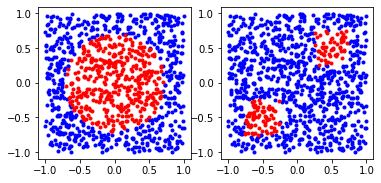

In [3]:
samples, labels = utils.load_data('data/data_4_1.npz')
plt.subplot(1, 2, 1)
utils.plot_data(samples, labels)
samples, labels = utils.load_data('data/data_4_2.npz')
plt.subplot(1, 2, 2)
utils.plot_data(samples, labels)

**Tasks**:
- We want to use an MLP to correctly classify these data sets. 
- Obviously, this is not possible using a single artificial neuron since the data are not linearly separable.
- Try to let your MLP learn both structures as well as possible. 

**Questions**:
- How many hidden neurons and which learning rate are required in order to successfully classify each structure?

**Answers**:
- 


In [9]:
hidden_neurons = 4
learning_rate = 0.01
epochs = 100

samples, labels = utils.load_data('data/data_4_1.npz')
generator = learn_mlp(samples, labels, hidden_neurons, learning_rate, epochs)
animation = utils.Animation(samples, labels, hidden_neurons)
animation.animate(generator,
                  max_frames=100)